<a href="https://colab.research.google.com/github/kumarsuraj151/Deep-Learning/blob/main/Deep_Learning_Tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Tutorial 2
## Date: $23^{\text{ rd}}$ January 2023
## Teaching Assistants: Tanmay Goyal(AI20BTECH11021) and G Savarana Datta Reddy(AI20BTECH11008)


#### <b>What is a Python Class ?</b>

A class is a user-defined blueprint or prototype from which objects are created.


 
#### <b>Why do we use Classes?</b>

Class creates a user-defined data structure, which holds its own data members and member functions that can be accessed and used by creating an instance of that class. A class is like a blueprint for an object.

In [ ]:
# the simplest example: the vehicle class

class vehicle:

    # constructor, self is a1ways an argument
    # self works similar to this in C++
    def __init__(self , color):
        self.color = color
        self.mfd = "12th July 2021"
        self.company = "Honda"
        self.puc = None

    # setter
    def set_puc(self , puc_done):
        self.puc = puc_done

    # getter
    def get_color(self):
        return self.color


In [ ]:
# creating an object
new_obj = vehicle("red")
print("The color of the car is ", new_obj.get_color())

# setting the PUC
print("The PUC status of the car is : " , new_obj.puc)
new_obj.set_puc(False)
print("The PUC status of the car is : " , new_obj.puc)

The color of the car is  red
The PUC status of the car is :  None
The PUC status of the car is :  False


####<b> Let's take an example</b>

Let's now create a class which is used to represent the basic features of a neural network like number of hidden layers present, dimension of the input vector, dimension of the output vector and actiavtion used in the network.

<b>Web Resources</b>
<br> <a href='https://docs.python.org/3/tutorial/classes.html'>Docs.python.org - Classes and Objects</a>


In [ ]:
class neural_network:

  def details_of_network(self): # A method. Which is basically a ftn which works on the attributes of the class. #
    print("Number of hidden layers: "+ str(self.no_of_hid_lays))
    print("Input dimension: "+ str(self.ip_dim))
    print("Output dimension: "+ str(self.op_dim))
    print("Activation used: "+ self.act)

In [ ]:
# creating an object nn1
nn1 = neural_network()

# setting the parameters of nn1
nn1.no_of_hid_lays = 40
nn1.ip_dim = 1024*1024
nn1.op_dim = 10
nn1.act = "Sigmoid"

nn1.details_of_network()

# Why not fix the features of the class that we use. #
# To deal with the default attributes, we use constructors in the classes #
# Or we can directly pass in all our arguments while creating the object using constructors#

Number of hidden layers: 40
Input dimension: 1048576
Output dimension: 10
Activation used: Sigmoid


In [ ]:
class neural_network:
    # constructor
    def __init__(self,no_of_hid_lays , ip_dim, op_dim,act):
        self.no_of_hid_lays = no_of_hid_lays
        self.ip_dim = ip_dim
        self.op_dim = op_dim
        self.act = act

    # method of the class
    def details_of_network(self): 
        print("Number of hidden layers: "+ str(self.no_of_hid_lays))
        print("Input dimension: "+ str(self.ip_dim))
        print("Output dimension: "+ str(self.op_dim))
        print("Activation function used : "+ str(self.act)+"\n")

In [ ]:
nn1 = neural_network(40, 1024*1024, 10 ,"ReLU")
nn1.details_of_network()

nn2 = neural_network(1, 10, 5, "Leaky ReLU")
nn2.details_of_network()

Number of hidden layers: 40
Input dimension: 1048576
Output dimension: 10
Activation function used : ReLU

Number of hidden layers: 1
Input dimension: 10
Output dimension: 5
Activation function used : Leaky ReLU



### The activation functions and their advantages/disadvantages... Anyone



1.   Sigmoid
2.   Tanh
3.   ReLU
4.   Leaky ReLU
5. Parametric ReLU??



### A basic network

In [ ]:
# importing required libraries and modules
import torch 
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [ ]:
# Loading the Dataset #
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True) 
# Downloads locally and it vanishes after the runtime ends. #
# Runtime?

test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# other transforms ->
# CenterCrop, Resize, Rotate etc.

# Note that for the argument of transform, if multiple transforms, they are supposed to be wrapped under transforms.compose()
# Again, the documentation is of great help!

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
## Create Class of the model ##
class Classification(torch.nn.Module): # inherits from torch.nn.Module
    
    # constructor
    def __init__(self, input_dim, output_dim):
        super(Classification, self).__init__()  
        # to make sure base class methods do not get overwritten
        self.linear = torch.nn.Linear(input_dim, output_dim , bias = True)

    # defining the forward path where you define the order of your layers and the activation functions
    def forward(self, x):
        outputs = self.linear(x)
        return outputs

In [ ]:
# important parameters
batch_size = 100
n_iters = 5000
epochs = n_iters / (len(train_dataset) / batch_size)  # Careful - difference between iterations and epochs ? #
input_dim = 28*28
output_dim = 10
lr_rate = 0.001 # too high or low?

In [ ]:
# sets your data appropriately

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)  # why shuffle?
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

<class 'torch.utils.data.dataloader.DataLoader'>


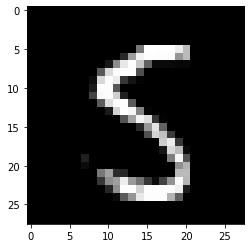

In [ ]:
import matplotlib.pyplot as plt
print(type(train_loader))
# iter converts into an iterator
print(iter(train_loader))
# next calls the next item in an iterator
images, labels = next(iter(train_loader))
plt.imshow(images[1].reshape(28,28), cmap="gray")

In [ ]:
# Inialize the model class(Object?) #
model = Classification(input_dim, output_dim)

In [ ]:
# define the loss function
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
# define the optimizer-> various kinds, can you name a few?
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)

In [ ]:
# counter for iterations
iteration = 0

# we wish to plot the accuracy and the loss. We keep two arrays to store them
loss_array = []
accuracy_array = []

# type cast?
for epoch in range(int(epochs)):

    # enumerate?
    for i, (images, labels) in enumerate(train_loader):
        # images = Variable(images.view(28*28,-1))
        images = (images.view(-1,28*28))
        labels = (labels)
        outputs = model(images)
        loss = criterion(outputs, labels) # Loss depends solely on the training set #   

        # three very important statements for training model
        optimizer.zero_grad()    # sets the optimizer's gradients to zero after every iteration 
        loss.backward() # propagates the errors backwards
        optimizer.step() # updates the weights 

        
        iteration+=1
        if iteration%500==0:
            # To calculate accuracy (Calculated for every 500 iterations)
            correct = 0
            total = 0
            with torch.no_grad():
                for images, labels in test_loader:
                    images = (images.view(-1, 28*28))
                    outputs = model(images)
                    # underscore?
                    _, predicted = torch.max(outputs.data, 1)
                    total+= labels.size(0)
                    correct+= (predicted == labels).sum()
            accuracy = 100 * correct/total
            accuracy_array.append(accuracy)
            loss_array.append(loss.item())
            print("Iteration no.: {}; Loss: {}; Accuracy: {};".format(iteration, loss.item(), accuracy))


Iteration no.: 500; Loss: 1.8458203077316284; Accuracy: 70.13999938964844;
Iteration no.: 1000; Loss: 1.5789097547531128; Accuracy: 77.01000213623047;
Iteration no.: 1500; Loss: 1.3511325120925903; Accuracy: 79.7300033569336;
Iteration no.: 2000; Loss: 1.204780101776123; Accuracy: 81.33000183105469;
Iteration no.: 2500; Loss: 1.0671188831329346; Accuracy: 82.47000122070312;
Iteration no.: 3000; Loss: 0.9820868968963623; Accuracy: 83.12999725341797;
Iteration no.: 3500; Loss: 0.9846546649932861; Accuracy: 83.87999725341797;
Iteration no.: 4000; Loss: 0.8601523041725159; Accuracy: 84.20999908447266;
Iteration no.: 4500; Loss: 0.7768661379814148; Accuracy: 84.70999908447266;


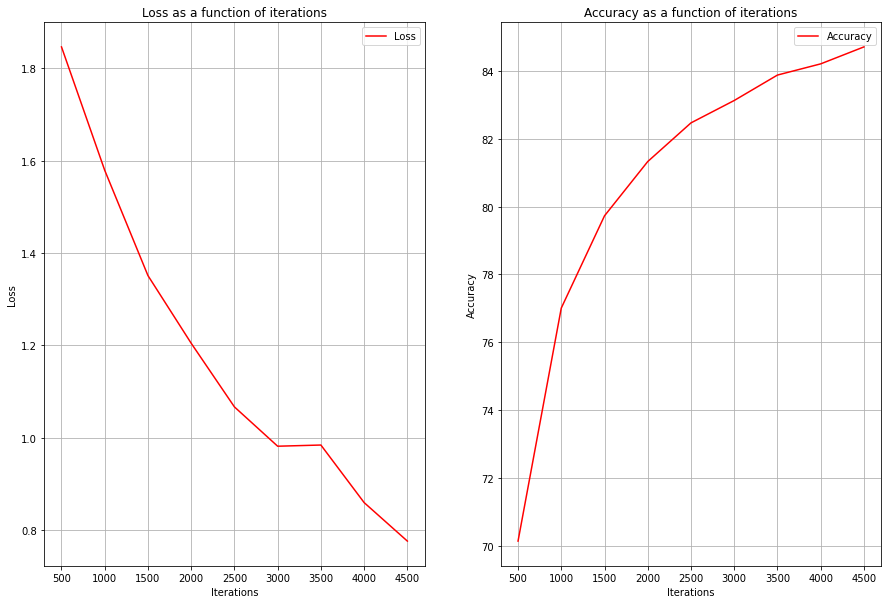

In [ ]:
import numpy as np

# plotting the loss and accuracy
plt.figure(figsize = (15,10))
x = np.arange(500, 5000 , 500)
plt.subplot(1,2,1)
plt.plot(x , loss_array , 'r-' , label = "Loss")
plt.grid(True)
plt.legend()
plt.title("Loss as a function of iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(x , accuracy_array , 'r-' , label = "Accuracy")
plt.grid(True)
plt.legend()
plt.title("Accuracy as a function of iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

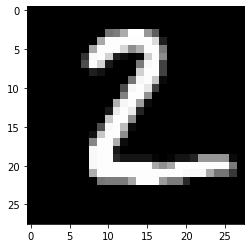

In [ ]:
# testing for an image
image , label = next(iter(test_loader))
plt.imshow(image[1].reshape(28,28), cmap="gray")

In [ ]:
with torch.no_grad():
    print(model(image[1].view(-1 , 28*28)))
    print("The prediction is {}".format(np.argmax(model(image[1].view(-1 , 28*28)))))
    print(image[1].shape , image[1].view(-1,28*28).shape)
    print(image.shape , image.view(-1,28*28).shape)

tensor([[ 0.6137, -0.1403,  2.1133,  1.2686, -2.4744,  0.9126,  1.5462, -2.6122,
          0.5873, -2.0865]])
The prediction is 2
torch.Size([1, 28, 28]) torch.Size([1, 784])
torch.Size([100, 1, 28, 28]) torch.Size([100, 784])


In [ ]:
# can print weights
print("The weights for the linear layer are {} and the shape is {}".format(model.linear.weight, model.linear.weight.shape)) ## but wasnt shape 784 * 10?

The weights for the linear layer are Parameter containing:
tensor([[ 0.0132,  0.0325,  0.0230,  ..., -0.0267,  0.0055,  0.0340],
        [ 0.0339,  0.0256,  0.0139,  ..., -0.0289,  0.0332, -0.0321],
        [-0.0291, -0.0122,  0.0057,  ..., -0.0330, -0.0261, -0.0244],
        ...,
        [-0.0150, -0.0002, -0.0144,  ..., -0.0008,  0.0058,  0.0340],
        [-0.0041, -0.0103,  0.0075,  ...,  0.0065,  0.0095,  0.0310],
        [-0.0042, -0.0279,  0.0172,  ..., -0.0229,  0.0236,  0.0115]],
       requires_grad=True) and the shape is torch.Size([10, 784])


In [ ]:
print("The bias for the linear layer are {} and the shape is {}".format(model.linear.bias , model.linear.bias.shape))

The bias for the linear layer are Parameter containing:
tensor([-0.0007,  0.1060,  0.0064, -0.0028,  0.0047,  0.0494,  0.0100,  0.0081,
        -0.0250, -0.0432], requires_grad=True) and the shape is torch.Size([10])


In [ ]:
# to convert to numpy
# print(model.linear.weight.numpy())  # returns error, requires detachment
print("Before detaching , the type is ", type(model.linear.weight))
print("After detaching, the type is " ,type(model.linear.weight.detach()))
print(model.linear.weight.detach().numpy())

Before detaching , the type is  <class 'torch.nn.parameter.Parameter'>
After detaching, the type is  <class 'torch.Tensor'>
[[ 0.01319036  0.03245408  0.02304921 ... -0.0267496   0.00547175
   0.03404332]
 [ 0.03391207  0.02556792  0.0139212  ... -0.02888117  0.03323754
  -0.032101  ]
 [-0.02906501 -0.01224937  0.00572186 ... -0.03297597 -0.02611332
  -0.02441637]
 ...
 [-0.01504054 -0.00023376 -0.0143572  ... -0.00083251  0.00579545
   0.03401381]
 [-0.00406551 -0.01034178  0.00746582 ...  0.00650198  0.00952765
   0.03103173]
 [-0.0041527  -0.02793686  0.01719252 ... -0.02291674  0.023599
   0.01150907]]


### Exercise

We will try doing a 1D DFT, however, this time, we will be calculating both the real and imaginary parts and wrap it in a class.

Please refer to the previous tutorial on how to do a DFT. We will be providing instructions to make your own class

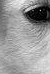

In [ ]:
#@title Generating data
#################
##             ##
## DONOT EDIT ##
##             ##
#################
import numpy as np
from PIL import Image

list = np.array([103,118,118,140,122,144,157,169,187,192,188,190,185,195,198,210,232,235,223,220,212,227,239,240,232,218,201,187,181,190,200,208,210,201,177,154,180,145,117,119,129,127,119,117,89,105,95,72,120,110,102,111,105,127,146,164,168,166,174,178,183,194,205,220,222,216,216,214,218,234,232,240,240,223,203,192,191,192,181,180,160,137,148,176,172,145,135,116,112,129,133,116,106,110,85,116,98,62,126,118,113,122,130,133,141,149,156,159,162,173,190,204,217,206,202,210,218,219,220,224,230,225,235,234,208,190,193,197,185,190,170,198,131,166,165,132,145,140,109,101,119,100,81,103,74,73,100,63,79,112,99,111,124,132,146,154,166,181,199,214,224,228,202,212,227,233,224,211,211,220,223,229,221,187,170,191,197,172,176,190,195,194,162,127,134,128,88,111,99,80,92,97,81,73,67,51,57,49,86,118,102,112,126,136,136,152,171,181,183,179,171,165,198,207,217,217,208,203,214,230,232,182,174,211,224,214,214,224,196,131,131,158,133,106,116,64,99,120,122,103,99,105,90,64,57,56,49,51,71,81,112,116,123,131,166,177,180,170,163,175,202,223,206,202,199,200,203,208,215,220,198,226,228,183,149,165,173,148,172,174,114,115,92,101,134,204,163,148,140,130,110,93,77,58,46,64,45,47,52,55,107,108,115,125,109,137,169,184,186,184,181,177,200,204,209,214,217,215,208,202,214,198,187,180,182,202,207,190,120,120,143,193,162,181,202,174,158,127,102,85,64,48,36,21,22,38,10,20,43,68,100,105,121,138,170,166,157,154,166,183,189,185,180,194,206,206,202,206,213,218,209,184,160,152,166,187,166,116,129,178,195,166,199,153,156,148,83,72,43,15,8,13,8,0,0,12,0,8,20,51,102,107,123,142,141,151,160,166,177,189,189,181,173,180,183,179,182,195,209,215,182,145,157,187,147,90,117,186,217,195,196,165,179,126,108,25,23,28,11,0,8,5,2,18,6,5,10,14,0,15,106,101,108,122,129,160,186,187,178,176,182,185,180,179,176,179,191,199,187,168,163,164,152,117,95,131,191,221,186,204,162,110,63,18,14,21,6,7,1,20,36,2,0,50,42,1,0,11,4,12,102,109,121,131,137,158,162,161,177,184,169,155,170,179,183,179,176,176,169,160,140,143,130,79,73,197,218,199,187,121,41,12,96,96,0,17,14,11,0,42,185,18,6,13,13,0,14,35,2,4,92,108,126,139,118,132,134,135,151,160,156,156,164,171,175,174,175,173,163,150,167,137,109,113,153,179,166,112,39,10,30,19,21,33,3,14,0,21,0,0,39,1,26,0,10,6,19,58,28,15,101,107,110,110,128,140,146,153,162,155,147,154,168,170,169,169,171,171,165,155,156,141,110,114,144,84,70,19,21,5,41,25,0,19,15,12,17,21,8,17,0,0,30,16,8,13,14,72,51,25,108,107,104,101,116,125,133,145,155,148,149,168,169,169,166,162,161,163,167,169,152,171,140,97,85,39,32,18,17,15,19,7,22,32,10,22,17,0,0,28,31,0,0,21,6,13,0,69,55,29,101,110,124,136,142,142,135,134,136,129,136,162,153,158,163,162,157,156,162,170,163,170,139,89,63,71,33,42,4,2,17,24,24,12,0,13,3,0,4,3,22,11,3,6,2,9,0,66,55,32,107,113,126,137,146,154,154,153,152,137,130,143,142,151,165,174,171,163,163,169,171,157,144,122,82,84,25,43,51,5,23,41,4,1,22,4,14,9,12,9,3,15,15,10,0,5,8,71,55,35,113,112,113,114,97,119,133,143,156,153,146,151,150,151,160,173,179,175,173,175,188,175,175,163,120,85,56,51,57,10,1,10,0,13,38,12,12,0,4,12,0,0,1,5,0,1,23,70,44,31,99,109,117,122,133,143,135,126,135,144,149,157,160,148,145,158,172,176,177,180,190,178,165,149,132,90,101,48,42,60,25,4,17,10,0,0,4,18,20,0,12,4,10,1,5,0,28,61,29,25,107,114,127,137,122,127,131,136,147,159,163,161,161,167,169,166,166,170,173,173,166,194,197,168,153,148,107,50,39,53,54,23,0,11,17,0,4,0,0,6,11,7,0,0,5,14,26,28,18,14,118,112,110,110,118,124,129,135,146,159,164,162,168,172,174,175,179,183,179,171,193,181,177,180,168,143,131,135,77,50,56,77,61,26,11,13,3,7,8,3,0,0,2,10,5,0,0,9,14,27,116,117,122,127,129,133,136,140,149,160,164,162,172,170,166,167,175,181,177,167,157,165,174,171,159,144,136,133,102,82,59,41,37,56,58,36,20,18,11,9,22,38,37,26,37,18,23,32,25,35,113,120,131,140,133,136,137,139,147,158,162,160,172,167,159,154,160,170,174,170,157,185,203,198,193,192,181,162,143,94,69,75,69,57,54,54,75,73,61,49,53,61,44,17,23,20,47,62,44,47,117,116,116,117,122,125,127,130,140,153,159,158,167,168,166,160,161,169,175,176,191,182,175,175,168,153,145,144,162,127,102,89,69,54,49,41,13,39,55,47,43,55,68,70,52,53,77,91,78,75,114,118,122,125,122,127,130,134,144,155,160,158,154,164,171,171,170,172,173,171,160,162,160,161,176,194,196,186,169,176,162,120,97,115,118,89,82,93,92,77,66,71,81,85,101,94,89,96,106,102,114,122,131,137,126,133,141,147,156,165,165,160,153,160,165,168,172,176,174,169,185,197,191,173,172,180,164,133,133,114,134,166,147,103,90,101,88,80,71,72,81,90,92,90,75,84,73,82,117,118,126,120,112,106,118,128,140,151,163,171,169,163,167,164,160,160,170,182,183,177,181,157,155,178,183,163,159,174,171,160,166,169,145,123,120,121,113,113,117,119,114,107,110,118,83,114,108,110,140,127,121,117,122,133,122,121,128,145,159,164,163,162,162,177,180,170,170,183,186,177,163,174,175,162,158,165,168,162,166,168,161,161,142,135,159,157,128,139,111,136,131,99,115,88,98,121,105,134,136,115,125,121,125,134,127,127,136,152,160,153,142,135,150,161,176,187,191,186,178,172,173,182,181,169,165,173,176,171,175,165,146,150,146,142,146,119,140,126,118,143,124,109,142,127,114,146,123,131,135,127,124,120,122,128,135,129,129,138,147,151,152,155,151,145,150,164,168,158,154,159,178,183,179,167,162,167,169,164,175,173,158,149,121,116,155,168,155,141,153,154,122,126,145,122,126,166,140,135,146,146,121,119,120,122,124,119,119,130,143,154,165,174,185,177,175,182,186,186,189,195,173,174,167,155,148,150,149,145,133,180,177,145,143,185,192,124,159,162,164,128,113,136,130,107,134,164,143,146,166,163,120,121,120,119,106,112,127,146,158,158,155,155,144,154,162,165,172,179,178,170,189,187,181,172,168,168,167,164,171,133,134,195,195,148,150,164,148,150,127,99,121,137,124,141,151,151,137,156,180,173,115,118,117,113,113,119,133,151,162,164,165,168,164,175,178,169,168,177,179,173,161,158,155,152,153,153,151,149,156,173,171,162,144,149,178,169,141,133,115,138,167,140,130,168,171,144,141,166,179,180,118,122,120,113,125,125,133,146,157,165,176,186,186,187,185,177,168,166,173,181,179,175,173,174,175,173,170,167,168,164,155,170,178,177,170,130,153,145,145,186,172,134,158,164,173,143,161,181,174,185,129,135,132,123,117,123,137,152,159,158,158,162,161,164,181,197,189,170,168,182,174,169,166,167,167,161,155,151,166,175,168,165,151,149,162,141,172,166,165,180,121,118,196,164,161,143,181,195,171,189,134,132,128,125,135,113,125,146,142,146,164,168,168,167,165,166,172,181,190,196,180,179,175,172,173,171,157,142,151,154,156,155,153,157,168,178,173,180,194,140,121,157,160,173,128,179,198,172,173,211,131,127,123,121,121,119,136,157,160,160,163,163,163,160,163,178,193,195,180,164,186,186,184,182,186,190,186,177,175,178,179,175,168,162,161,162,156,186,135,141,179,154,150,162,167,165,170,187,205,208,133,137,140,141,120,137,147,154,162,156,145,143,150,162,173,173,165,164,175,187,173,174,172,167,167,172,175,173,155,155,153,150,144,138,134,131,156,153,143,173,164,145,172,157,175,168,181,209,212,192,138,136,134,132,124,151,152,148,165,168,160,166,178,158,141,147,169,187,188,182,180,183,180,170,163,163,165,164,171,168,165,166,169,173,176,178,180,142,186,172,129,161,175,162,170,188,205,208,199,193,148,144,139,134,140,164,157,142,151,151,142,148,145,164,182,183,172,168,180,195,178,184,186,178,170,169,169,168,160,159,159,163,168,173,176,176,184,170,170,141,154,178,156,174,190,201,203,195,196,207,149,150,147,144,131,153,165,170,182,191,195,202,166,161,160,170,184,186,174,160,161,171,177,176,175,178,179,178,175,177,180,181,179,174,169,166,162,165,144,167,169,154,185,188,200,201,202,200,193,190,145,140,134,130,157,157,164,161,144,135,135,131,159,168,174,168,157,156,168,182,174,181,186,186,188,192,193,190,178,181,182,178,170,164,161,162,163,163,163,187,163,158,208,192,189,192,197,198,189,183,155,156,156,155,150,140,155,166,152,156,174,176,166,167,168,170,172,175,177,179,185,187,186,182,180,182,180,175,182,182,179,171,164,166,176,185,192,207,190,142,181,215,173,184,184,181,174,175,194,214,151,156,155,153,145,157,165,164,160,159,160,159,173,175,174,169,167,169,176,181,196,188,180,183,191,196,193,187,199,184,168,158,154,158,173,189,173,152,151,176,194,187,179,182,171,194,185,177,202,216,172,161,145,132,146,155,162,160,154,149,144,139,150,174,182,172,177,198,200,184,165,182,198,198,185,175,178,185,156,175,186,185,193,201,184,155,156,150,161,188,203,194,179,174,201,192,177,187,207,199,159,154,150,147,157,161,164,165,167,169,169,167,183,167,170,190,192,173,168,181,185,189,191,188,183,181,185,190,180,196,197,178,170,181,188,181,171,178,187,188,181,178,185,196,186,171,164,185,205,196,146,152,163,172,179,173,165,159,158,161,163,163,151,172,171,150,158,189,191,166,196,191,186,186,190,194,193,191,206,183,172,186,197,188,171,162,196,196,189,178,174,180,187,189,158,164,173,188,204,208,168,166,167,168,171,167,164,164,166,169,172,173,178,149,145,172,178,160,162,186,161,177,196,204,199,190,186,186,153,177,208,213,183,156,172,209,192,185,180,186,202,204,178,146,174,178,193,207,210,209,174,171,168,165,162,165,171,177,179,176,174,174,170,185,183,165,164,178,174,154,168,174,183,193,198,198,193,189,207,188,165,161,185,211,211,195,186,195,204,206,200,187,171,159,196,178,191,215,211,198,163,167,168,168,172,172,172,169,158,146,140,141,167,152,155,177,180,166,171,193,196,185,176,178,190,200,200,196,201,194,186,189,205,216,206,188,197,206,212,201,177,162,173,193,190,175,189,206,198,197,168,169,164,158,161,161,162,162,159,160,171,183,168,165,159,154,151,155,166,177,180,192,201,196,184,178,186,196,196,186,194,216,218,201,198,211,208,188,175,178,180,175,176,183,181,190,206,198,185,206,175,173,167,160,157,156,155,158,165,169,162,153,171,166,158,153,153,158,165,170,181,191,199,197,195,196,196,195,198,217,218,197,186,195,199,192,186,194,189,174,175,189,189,176,195,195,198,199,195,195,178,177,170,163,162,177,183,170,151,145,155,166,122,139,156,161,160,167,187,206,201,196,185,175,178,191,203,207,195,207,212,204,201,203,195,181,173,179,183,185,186,192,198,202,200,193,189,193,198,202,172,171,165,159,170,157,144,140,148,155,152,145,169,171,176,182,186,186,183,180,196,193,186,181,182,186,181,173,199,192,183,180,185,191,189,184,209,206,207,207,195,181,182,194,197,185,178,187,201,210,180,180,177,173,159,161,159,154,150,153,163,170,163,158,158,169,185,191,184,173,164,177,194,209,221,226,218,207,196,181,170,171,177,181,183,186,168,170,174,178,177,179,188,198,185,176,174,188,205,215,173,175,175,174,166,163,161,160,161,162,162,163,174,179,180,173,162,156,159,164,185,192,193,187,180,176,172,168,188,186,192,201,201,190,182,181,207,210,202,186,183,194,196,188,181,180,186,200,212,217,165,166,168,169,169,151,140,152,173,180,165,148,155,157,161,164,170,179,190,199,176,186,193,193,194,202,212,216,198,201,205,205,199,191,187,187,174,183,178,164,170,192,198,187,192,194,202,212,217,217,174,174,175,176,155,167,181,182,170,163,173,187,178,168,159,158,163,166,162,157,177,183,187,186,187,190,190,187,201,203,196,184,178,183,188,189,201,204,199,187,181,182,181,176,206,205,207,213,216,216,162,160,160,160,173,172,172,172,167,159,158,160,163,174,182,179,168,166,175,187,182,179,172,169,177,190,195,194,183,191,191,182,181,187,184,173,167,171,182,191,190,187,193,205,214,207,203,207,212,215,159,154,154,158,185,188,181,166,164,172,171,160,175,176,180,184,186,184,179,174,157,162,176,190,191,184,184,190,200,196,189,180,175,178,187,194,196,185,182,193,201,200,203,210,208,211,213,214,213,213,163,159,162,169,149,163,172,172,175,178,168,152,165,165,165,168,171,172,170,168,172,166,167,175,181,181,182,187,183,178,171,168,170,174,178,180,191,188,190,200,208,213,218,223,221,219,217,215,213,213,160,154,157,164,150,159,163,164,169,178,176,167,162,161,160,163,168,173,175,175,192,180,173,179,190,195,195,194,194,188,184,185,190,194,193,190,183,191,198,202,208,217,223,223,217,212,209,211,216,221,159,155,154,156,161,163,161,157,162,171,173,170,160,159,160,165,172,177,180,181,172,167,165,172,183,187,185,181,190,189,187,188,189,189,188,187,185,199,208,204,206,215,219,215,209,204,201,206,216,224,165,167,162,156,146,151,156,159,162,164,159,152,156,157,159,165,171,175,175,174,165,167,168,169,173,178,182,183,183,187,190,187,182,179,183,188,193,207,214,210,209,216,218,213,215,209,204,205,210,214,164,167,159,147,147,147,147,149,154,159,161,161,162,163,164,168,173,175,174,172,180,183,180,171,167,175,187,194,182,190,196,194,186,185,193,202,193,201,207,207,209,213,214,211,212,207,203,203,207,209,161,163,155,143,161,154,148,147,152,159,166,171,164,162,162,164,169,173,175,175,174,178,174,161,155,161,171,176,171,178,184,184,182,183,190,197,198,195,197,204,208,207,207,209,205,204,202,203,206,211,165,167,163,154,155,155,158,165,166,161,153,150,152,149,146,148,154,162,168,171,175,182,182,172,167,170,171,167,177,180,184,188,191,194,197,200,210,200,199,209,214,208,205,210,212,211,208,205,205,208,166,170,173,173,172,160,145,137,137,142,146,147,144,143,142,145,150,154,157,158,161,167,173,173,169,166,168,172,171,180,188,189,192,199,203,204,212,197,196,203,203,209,214,207,211,207,204,209,217,219,189,190,176,160,153,153,152,149,146,144,144,144,142,150,156,153,145,143,152,162,154,160,167,170,170,174,182,188,170,180,187,187,188,196,206,211,218,206,208,211,204,203,202,191,203,204,209,215,219,216,180,169,160,156,142,148,153,151,144,139,138,140,142,136,133,139,150,157,156,152,168,170,169,165,159,158,162,166,177,184,185,179,176,181,190,194,194,192,204,213,211,216,219,210,205,210,218,223,222,212,163,153,154,159,156,155,152,146,140,139,142,146,144,134,127,134,150,161,158,151,152,155,159,161,162,165,170,174,194,196,194,190,190,196,198,197,203,203,213,216,207,210,213,203,212,212,215,218,216,206,174,177,168,157,168,162,153,149,149,152,154,154,144,153,159,153,142,141,152,165,154,159,167,172,175,177,178,179,179,179,178,183,195,206,204,195,201,201,207,205,196,203,210,200,211,204,200,202,207,203,177,176,168,160,160,156,152,154,158,159,154,148,140,146,151,149,144,145,154,163,162,166,171,175,176,173,169,166,171,170,169,173,185,194,189,179,184,183,189,188,186,202,213,204,207,201,197,201,209,211,168,159,162,170,158,159,160,160,158,153,146,142,137,131,128,136,150,157,152,144,135,139,148,158,168,174,177,177,189,190,187,184,185,189,187,182,192,188,189,183,179,194,199,183,200,203,208,212,214,214,172,172,173,175,174,176,175,168,157,148,145,146,138,142,146,147,145,141,138,137,142,143,146,151,157,161,163,163,173,178,179,171,167,171,177,180,172,171,177,179,185,207,215,198,190,201,214,216,210,205])

l = list.reshape((74 , 50))

img = Image.fromarray(np.uint8(l))

img




In [ ]:
# create a class DFT

    ## define the constructor with the the argument as the input (dont forget self ;-))

        # define an attribute inp that will hold the input. While storing the input, reshape into 1D vector and take a transpose

        # define  an attribute N which is equal to the length of the input

        # define an attribute constant which is equal to -2*pi/N

        # define an attribute real_part which will hold the real part of the DFT. For now, set it to None

        # define an attribute img_part which will hold the imaginary part of the DFT. For now, set it to None

        # define an attribute mult_matrix which will store the angle arguments. For now, set it to None


    ## define a method to construct the multiplying matrix. Name it construct_matrix. 
    ## It will require no arguments. All the required values can be derived from self.

        # First create a tensor named mat such that element in row i and column j is i*j. 
        # Make sure you convert the dtype to torch.float

        # multiply mat by the constant we had defined in the constructor

        # set the attribute mult_matrix to this matrix we just constructed

    
    ## define a method to calculate the real part called real_calc. It again will take no arguments
        
        # we wish to first invoke construct_matrix, which needs to be done only if self.mult_matrix is None. write a conditional

        # take the cosine of the attribute mult_matrix and store it in mat

        # multiply the attribute inp and mat. Store it in self.real_part

    ## define a method to calculate the img part called img_calc. It again will take no arguments
        
        # we wish to first invoke construct_matrix, which needs to be done only if self.mult_matrix is None. write a conditional

        # take the sine of the attribute mult_matrix and store it in mat

        # multiply the attribute inp and mat. Store it in self.img_part

    ## define a method to wrap all this together to calculate and show the DFT. call it calc_DFT

        # call construct_matrix

        # call real_calc

        # call img_calc

        # print the real part and imaginary parts



In [ ]:
## convert list into a tensor with name vec. Convert dtype to torch.float

## create an object dft from the class DFT. pass vec as an arg

## call the method calc_DFT on dft
